In [1]:
import pandas as pd # type: ignore
import numpy as np # type: ignore
import matplotlib.pyplot as plt # type: ignore
import seaborn as sns # type: ignore
import modelo_ini_corona as cu

In [2]:
path_gas='C:/Users/ccollazos/Documents/Summan/Corona/gas_consumo.csv'

In [3]:
dfgas=pd.read_csv(path_gas, low_memory=True, index_col=[0], parse_dates=True, delimiter=';',date_format='%d/%m/%Y', dayfirst=True, decimal=',')

In [4]:
dfgas.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 329 entries, 2024-01-01 to 2024-11-24
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   lec_ini_cont_m3_gas            329 non-null    int64  
 1   lec_fin_cont_m3_gas            329 non-null    int64  
 2   delta_lect_cont_m3_gas         329 non-null    int64  
 3   consumo_m3_std/dia_gas         329 non-null    float64
 4   consumo_Gj/dia_gas             329 non-null    float64
 5   masa_ton/dia_gas               316 non-null    float64
 6   consumo_especifico_Gj/ton_gas  316 non-null    float64
 7   consumo_especifico_kcal/kg     315 non-null    float64
 8   lec_ini_cont_kW_energia        329 non-null    int64  
 9   lec_fin_cont_kW_energia        329 non-null    int64  
 10  consumo_especifoco_energia     329 non-null    int64  
dtypes: float64(5), int64(6)
memory usage: 30.8 KB


In [5]:
dfgas.describe().T

,count,mean,std,min,25%,50%,75%,max
lec_ini_cont_m3_gas,329.0,4.888344e+05,272777.608562,1.690000e+02,2.800190e+05,4.748140e+05,7.108920e+05,9.971720e+05
lec_fin_cont_m3_gas,329.0,4.895474e+05,272591.678121,1.690000e+02,2.800190e+05,4.752110e+05,7.108920e+05,9.971720e+05
delta_lect_cont_m3_gas,329.0,6.792082e+03,810.492505,0.000000e+00,6.809000e+03,6.960000e+03,7.055000e+03,7.853000e+03
consumo_m3_std/dia_gas,329.0,6.370436e+03,479.031233,2.356364e+03,6.294814e+03,6.401071e+03,6.508244e+03,7.725638e+03
consumo_Gj/dia_gas,329.0,2.372817e+02,17.905109,8.779549e+01,2.345036e+02,2.384967e+02,2.424899e+02,2.878486e+02
masa_ton/dia_gas,316.0,4.836760e+01,3.970759,1.000000e+01,4.727500e+01,4.883000e+01,5.010000e+01,6.180000e+01
consumo_especifico_Gj/ton_gas,316.0,4.958906e+00,0.951082,1.784461e+00,4.746614e+00,4.910790e+00,5.096591e+00,1.874049e+01
consumo_especifico_kcal/kg,315.0,1.212316e+03,232.622052,4.354800e+02,1.159298e+03,1.200826e+03,1.246235e+03,4.578829e+03
lec_ini_cont_kW_energia,329.0,5.934777e+06,173626.384740,5.638868e+06,5.784686e+06,5.933050e+06,6.084079e+06,6.237697e+06
lec_fin_cont_kW_energia,329.0,5.936603e+06,173663.556274,5.640618e+06,5.786471e+06,5.934879e+06,6.085936e+06,6.239561e+06


array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

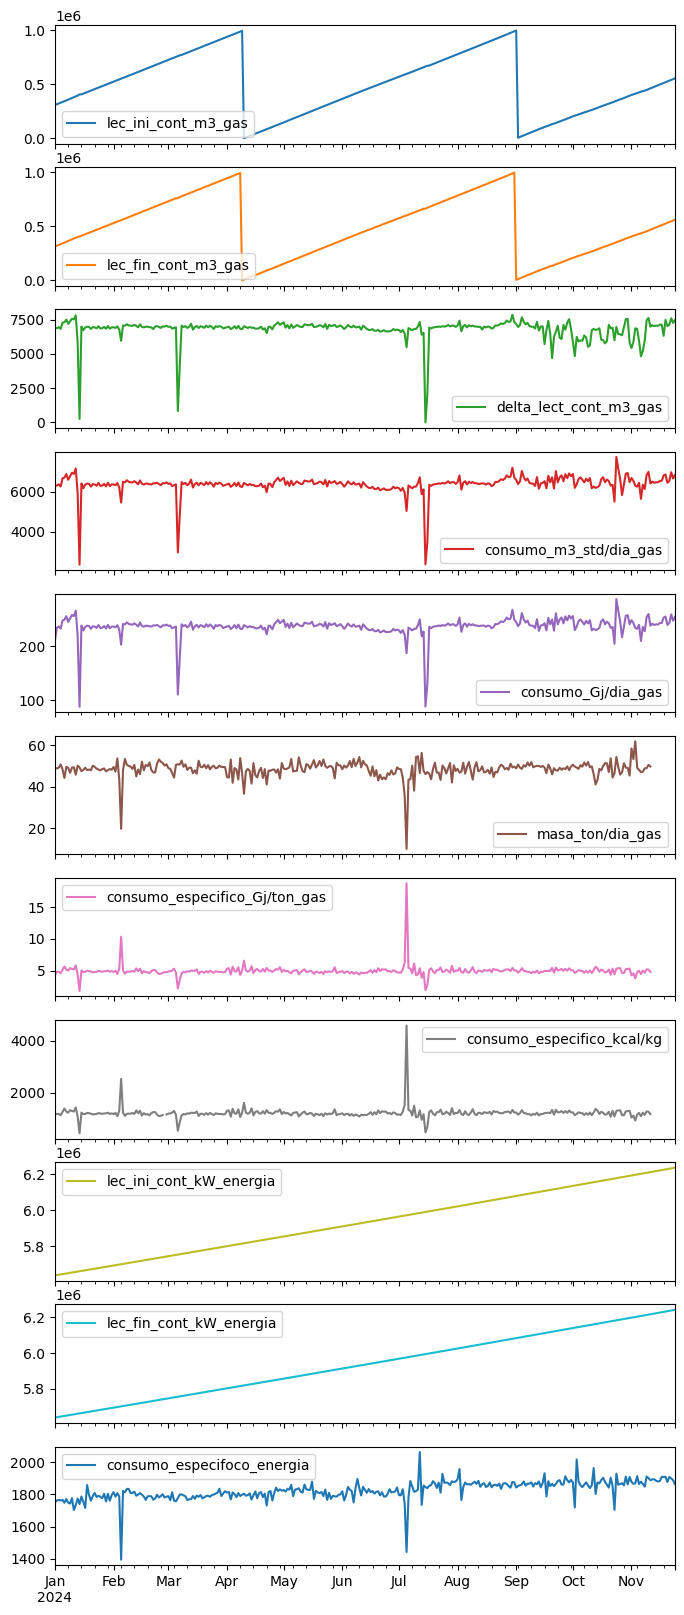

In [6]:
dfgas.plot(subplots=True, figsize=(8,20))

In [7]:
cond_01=(dfgas.index.to_period('M')>'2024-08')

<Axes: >

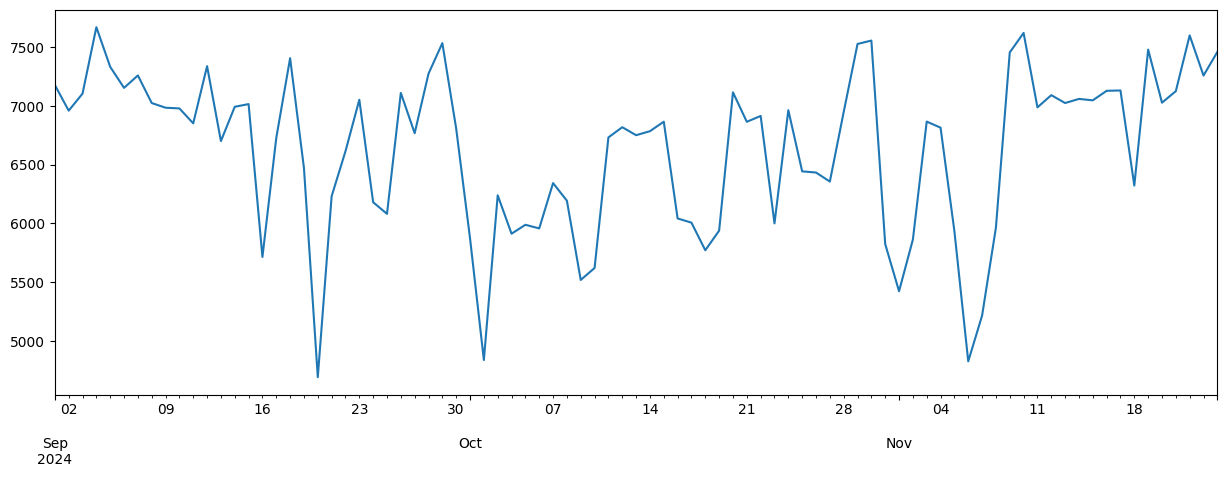

In [8]:
dfgas['delta_lect_cont_m3_gas'].iloc[cond_01].plot(figsize=(15,5))

In [41]:
anoma_gas=cu.anomalias_serie_tiempo(dfgas['delta_lect_cont_m3_gas'].values,8,1)

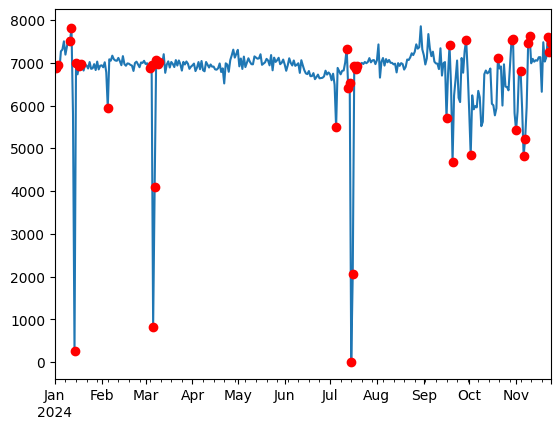

In [42]:
dfgas['delta_lect_cont_m3_gas'].plot()
plt.plot(dfgas.index[anoma_gas['anomalias'][:,0].astype(int)],anoma_gas['anomalias'][:,1],'or' )


# Aprox Datos Nulos

In [9]:
from sklearn.tree import DecisionTreeRegressor # type: ignore

In [10]:
dfaprox=dfgas.dropna().copy()

In [11]:
dfaprox.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 315 entries, 2024-01-01 to 2024-11-11
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   lec_ini_cont_m3_gas            315 non-null    int64  
 1   lec_fin_cont_m3_gas            315 non-null    int64  
 2   delta_lect_cont_m3_gas         315 non-null    int64  
 3   consumo_m3_std/dia_gas         315 non-null    float64
 4   consumo_Gj/dia_gas             315 non-null    float64
 5   masa_ton/dia_gas               315 non-null    float64
 6   consumo_especifico_Gj/ton_gas  315 non-null    float64
 7   consumo_especifico_kcal/kg     315 non-null    float64
 8   lec_ini_cont_kW_energia        315 non-null    int64  
 9   lec_fin_cont_kW_energia        315 non-null    int64  
 10  consumo_especifoco_energia     315 non-null    int64  
dtypes: float64(5), int64(6)
memory usage: 29.5 KB


In [12]:
dfaprox.columns

Index(['lec_ini_cont_m3_gas', 'lec_fin_cont_m3_gas', 'delta_lect_cont_m3_gas',
       'consumo_m3_std/dia_gas', 'consumo_Gj/dia_gas', 'masa_ton/dia_gas',
       'consumo_especifico_Gj/ton_gas', 'consumo_especifico_kcal/kg',
       'lec_ini_cont_kW_energia', 'lec_fin_cont_kW_energia',
       'consumo_especifoco_energia'],
      dtype='object')

In [13]:
X_col=['lec_ini_cont_m3_gas', 'lec_fin_cont_m3_gas', 'delta_lect_cont_m3_gas','consumo_m3_std/dia_gas', 'consumo_Gj/dia_gas','lec_ini_cont_kW_energia', 'lec_fin_cont_kW_energia','consumo_especifoco_energia']
y_col=['masa_ton/dia_gas','consumo_especifico_Gj/ton_gas', 'consumo_especifico_kcal/kg']

In [14]:
x_train=dfaprox[X_col].values
y_train=dfaprox[y_col].values

In [15]:
model_aprox=DecisionTreeRegressor().fit(x_train,y_train)

In [16]:
model_aprox.score(x_train,y_train)

1.0

In [17]:
for i,j in zip(model_aprox.feature_importances_,X_col):
    print(j,np.round(i*100,1))

lec_ini_cont_m3_gas 2.1
lec_fin_cont_m3_gas 1.0
delta_lect_cont_m3_gas 1.7
consumo_m3_std/dia_gas 3.2
consumo_Gj/dia_gas 11.4
lec_ini_cont_kW_energia 13.2
lec_fin_cont_kW_energia 1.4
consumo_especifoco_energia 66.1


In [18]:
x_real=dfgas.iloc[dfgas.isna().sum(axis=1).values!=0][X_col].values

In [19]:
y_aprox=model_aprox.predict(x_real)
y_aprox

array([[  53.        ,    4.48319577, 1096.700622  ],
       [  49.63      ,    4.80549551, 1172.423455  ],
       [  49.63      ,    4.80549551, 1172.423455  ],
       [  49.63      ,    4.80549551, 1172.423455  ],
       [  49.63      ,    4.80549551, 1172.423455  ],
       [  49.63      ,    4.80549551, 1172.423455  ],
       [  49.        ,    4.74678252, 1157.160173  ],
       [  49.91      ,    5.01003997, 1223.985837  ],
       [  50.42      ,    5.15935792, 1261.008641  ],
       [  49.63      ,    4.80549551, 1172.423455  ],
       [  49.        ,    4.74678252, 1157.160173  ],
       [  50.42      ,    5.15935792, 1261.008641  ],
       [  49.63      ,    4.80549551, 1172.423455  ],
       [  48.9       ,    5.18642326, 1263.186493  ]])

In [20]:
dfgas_clean=dfgas.copy()

In [21]:
dfgas_clean.loc[dfgas.isna().sum(axis=1).values!=0,y_col]=y_aprox

In [22]:
dfgas_clean.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 329 entries, 2024-01-01 to 2024-11-24
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   lec_ini_cont_m3_gas            329 non-null    int64  
 1   lec_fin_cont_m3_gas            329 non-null    int64  
 2   delta_lect_cont_m3_gas         329 non-null    int64  
 3   consumo_m3_std/dia_gas         329 non-null    float64
 4   consumo_Gj/dia_gas             329 non-null    float64
 5   masa_ton/dia_gas               329 non-null    float64
 6   consumo_especifico_Gj/ton_gas  329 non-null    float64
 7   consumo_especifico_kcal/kg     329 non-null    float64
 8   lec_ini_cont_kW_energia        329 non-null    int64  
 9   lec_fin_cont_kW_energia        329 non-null    int64  
 10  consumo_especifoco_energia     329 non-null    int64  
dtypes: float64(5), int64(6)
memory usage: 30.8 KB


In [23]:
dfgas_clean.iloc[:,2:8].corr()

,delta_lect_cont_m3_gas,consumo_m3_std/dia_gas,consumo_Gj/dia_gas,masa_ton/dia_gas,consumo_especifico_Gj/ton_gas,consumo_especifico_kcal/kg
delta_lect_cont_m3_gas,1.000000,0.836695,0.833465,0.084633,0.225538,0.226728
consumo_m3_std/dia_gas,0.836695,1.000000,0.997218,0.208250,0.183463,0.183652
consumo_Gj/dia_gas,0.833465,0.997218,1.000000,0.206982,0.185711,0.183728
masa_ton/dia_gas,0.084633,0.208250,0.206982,1.000000,-0.780375,-0.780645
consumo_especifico_Gj/ton_gas,0.225538,0.183463,0.185711,-0.780375,1.000000,0.999536
consumo_especifico_kcal/kg,0.226728,0.183652,0.183728,-0.780645,0.999536,1.000000


array([[<Axes: >, <Axes: >]], dtype=object)

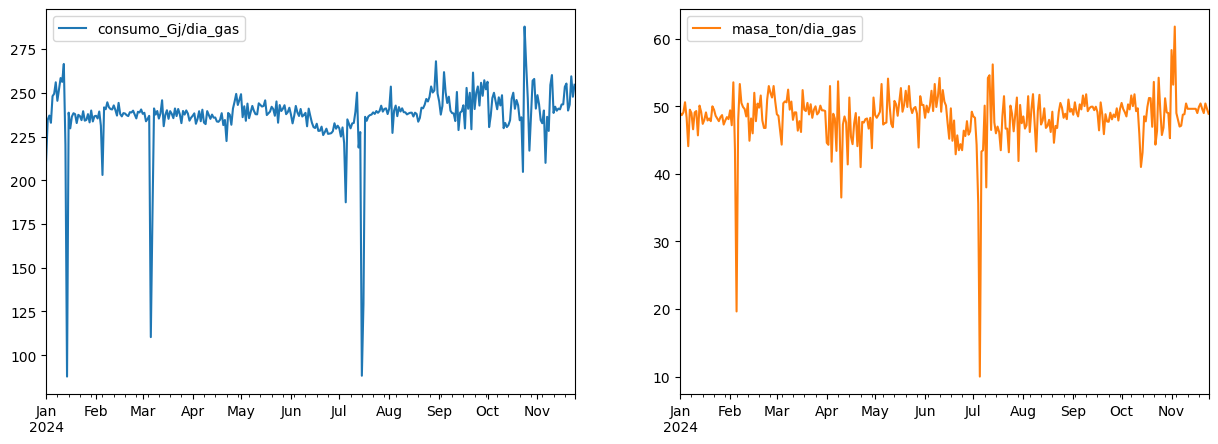

In [24]:
dfgas_clean.iloc[:,[4,5]].plot(subplots=True, figsize=(15,5), layout=(1,2))

<Axes: >

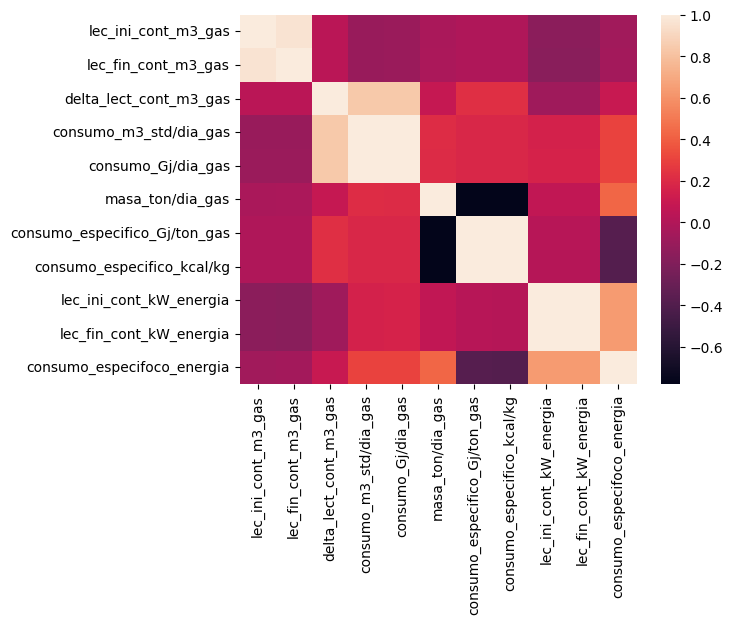

In [25]:
sns.heatmap(dfgas_clean.corr())

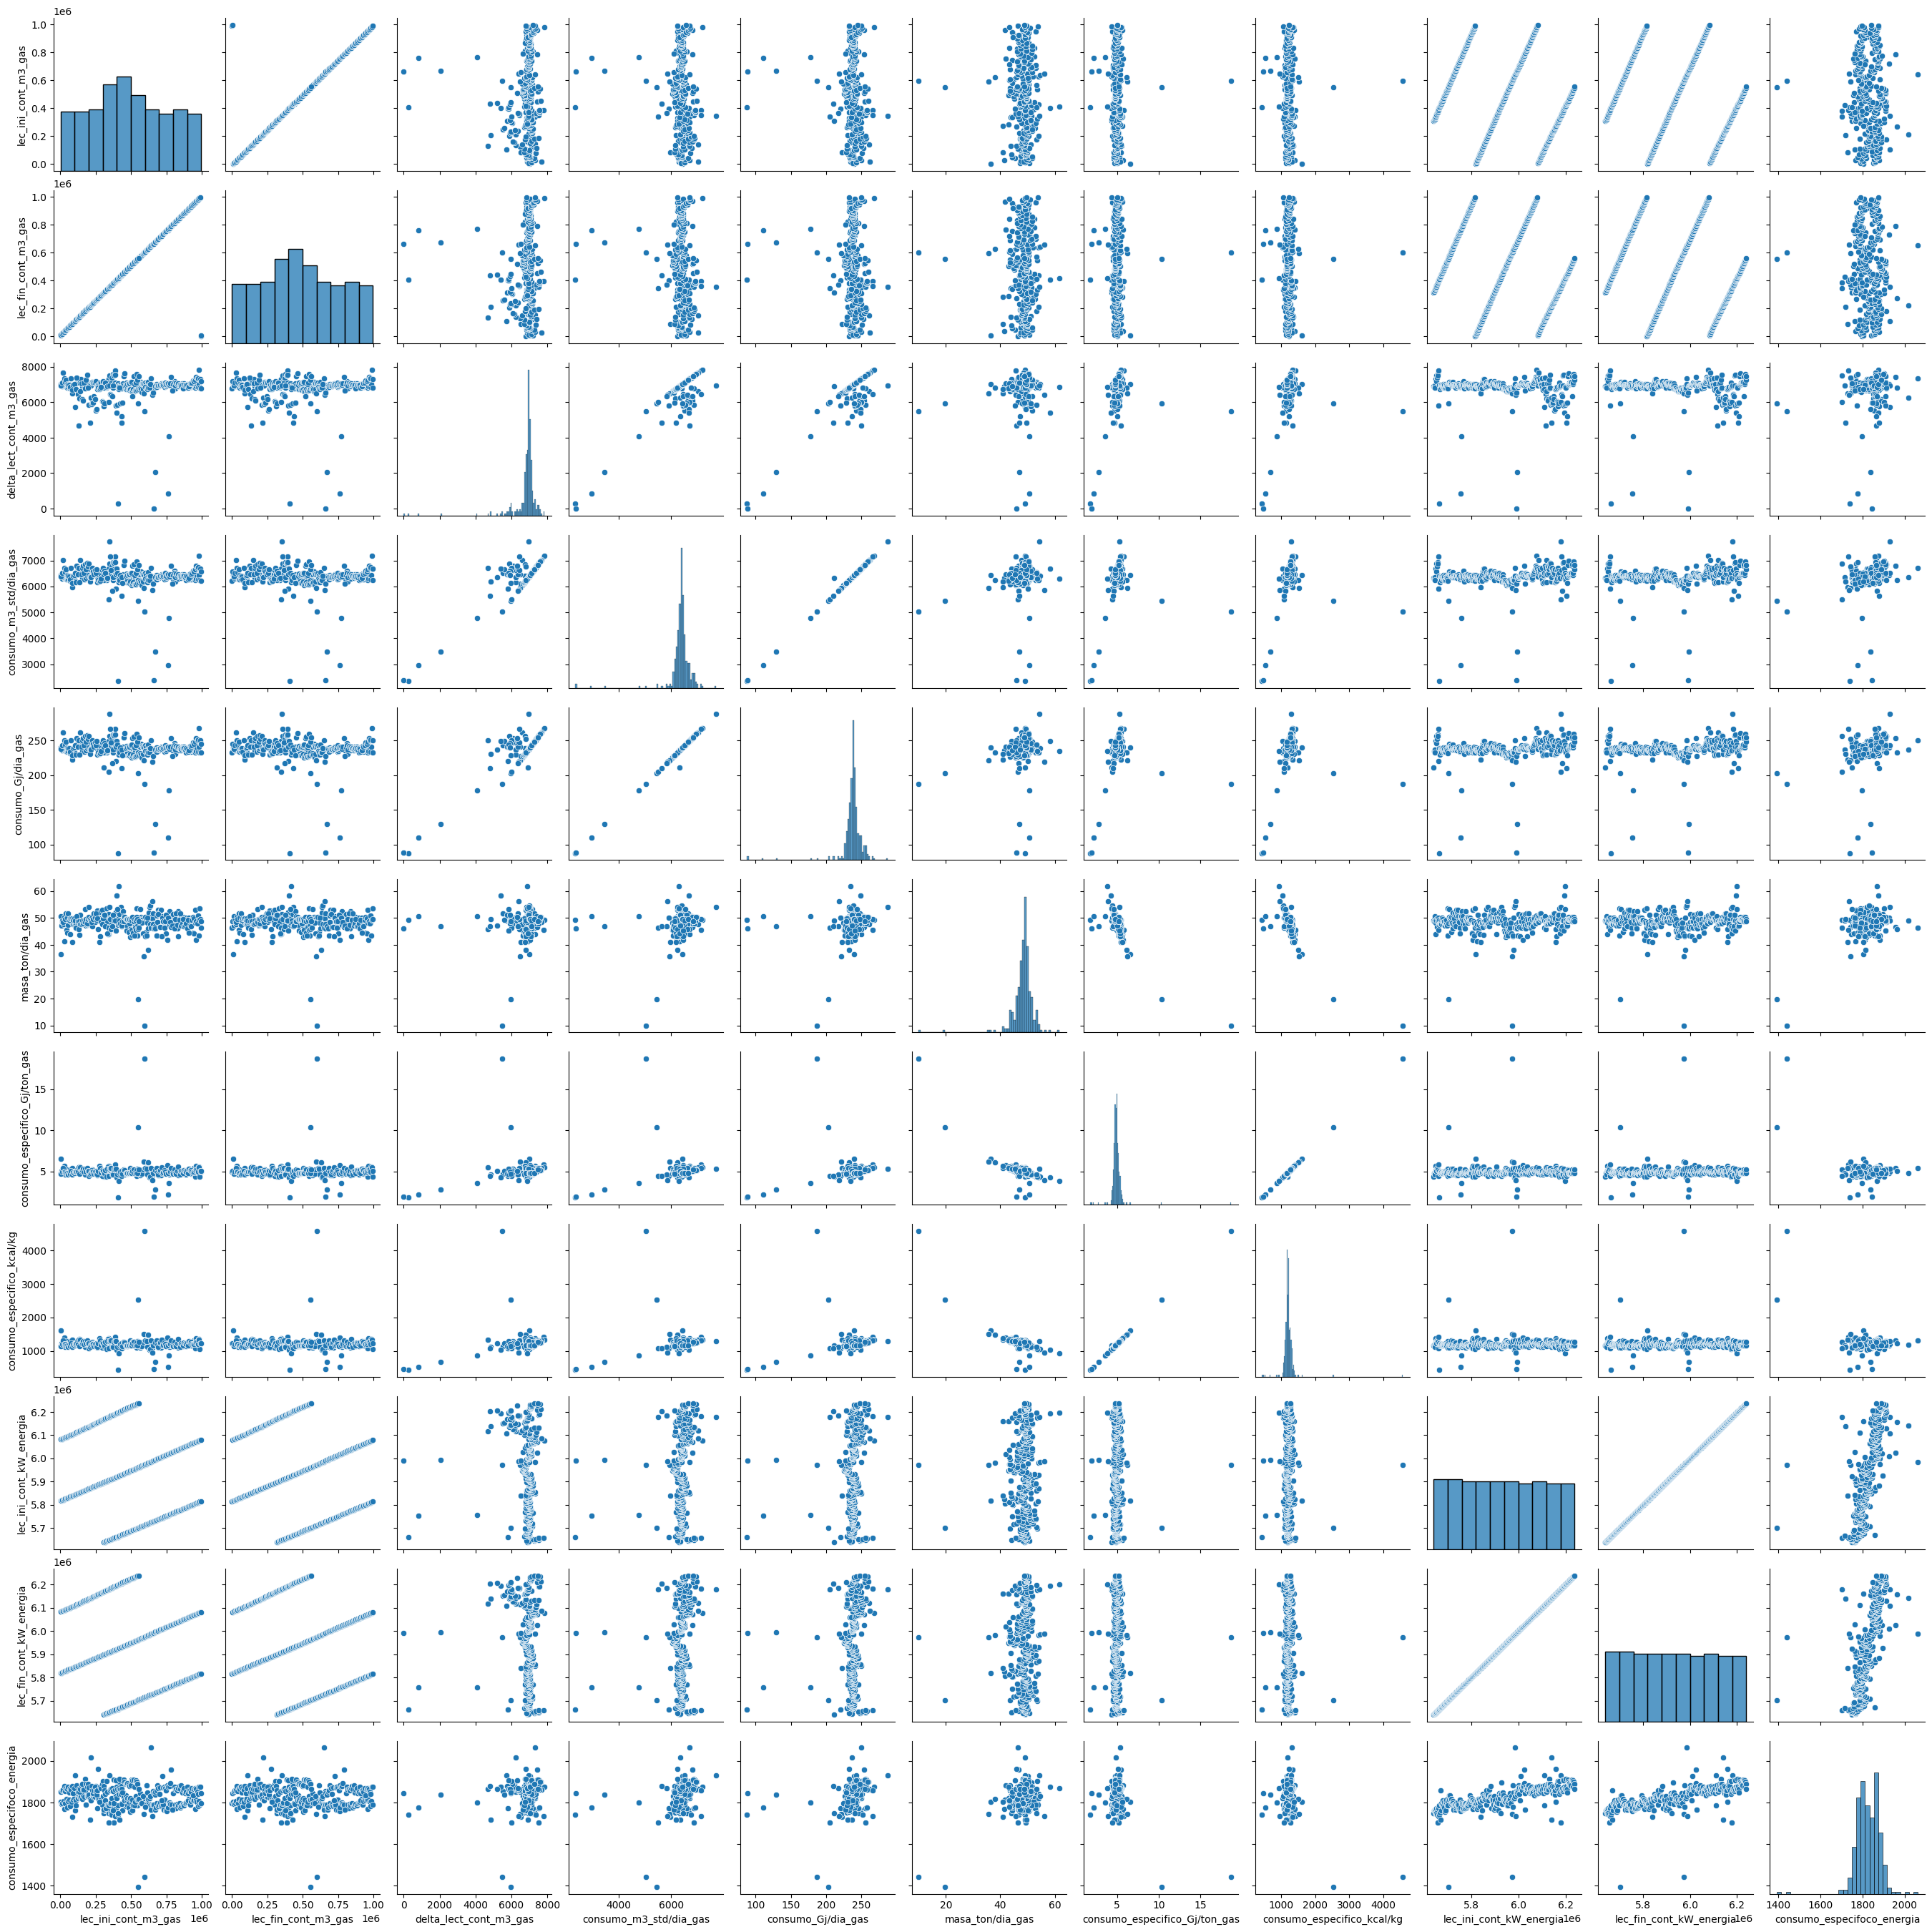

In [28]:
sns.pairplot(dfgas_clean)

In [26]:
dfgas_clean=dfgas_clean.resample('D').first()

<Axes: >

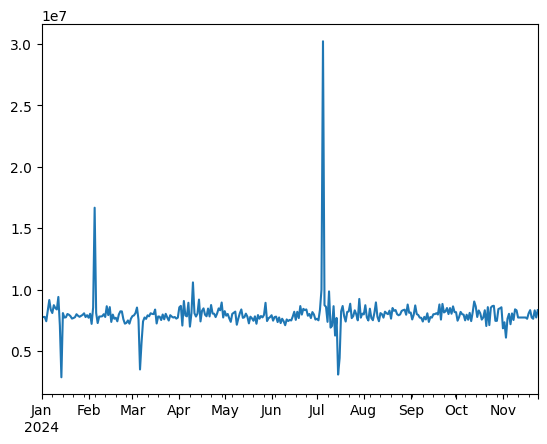

In [39]:
(dfgas_clean['consumo_especifico_kcal/kg']*6600).plot()

<Axes: xlabel='consumo_especifico_kcal/kg', ylabel='Count'>

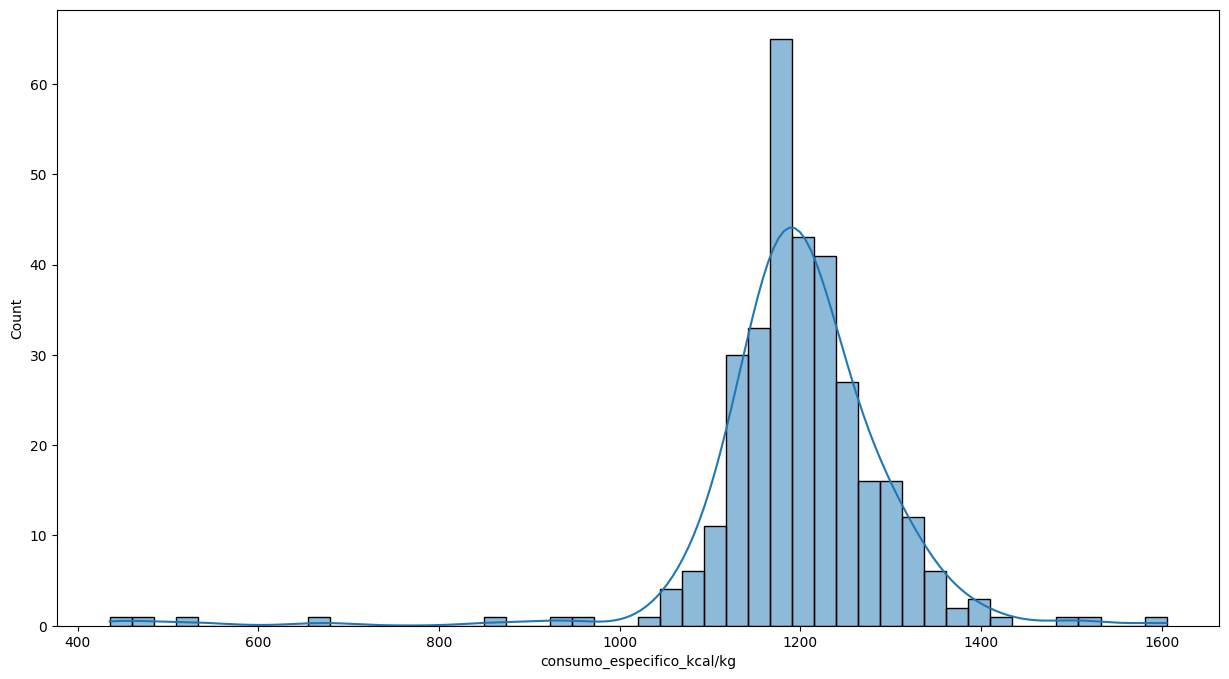

In [31]:
plt.figure(figsize=(15,8))
sns.histplot(dfgas_clean.loc[dfgas_clean['consumo_especifico_kcal/kg']<2500,['consumo_especifico_kcal/kg']],x='consumo_especifico_kcal/kg', kde=True)

In [32]:
dfgas_clean.loc[dfgas_clean['consumo_especifico_kcal/kg']<2500,['consumo_especifico_kcal/kg']].describe()

,consumo_especifico_kcal/kg
count,327.000000
mean,1196.952641
std,109.265241
min,435.479992
25%,1159.298161
50%,1198.697978
75%,1244.001654
max,1605.532601


In [46]:
anoma_ce=cu.anomalias_serie_tiempo(dfgas_clean['consumo_especifico_kcal/kg'].values,8,1)

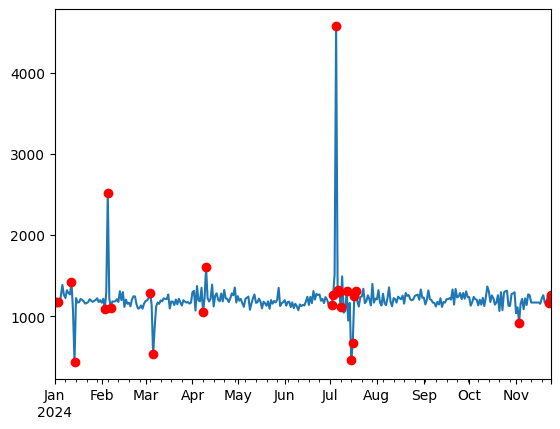

In [48]:
dfgas_clean['consumo_especifico_kcal/kg'].plot()
plt.plot(dfgas_clean.index[anoma_ce['anomalias'][:,0].astype(int)],anoma_ce['anomalias'][:,1],'or' )


In [28]:
#dfgas_clean.to_csv('datos_gas_horno4.csv')

In [132]:
dfgas_c2=dfgas_clean[dfgas_clean['masa_ton/dia_gas']>20].copy()

In [139]:
dfgas_c2['Produccion']=pd.qcut(dfgas_c2['masa_ton/dia_gas'],2, labels=["Limite Inferior","Limite Superior"])

<Axes: xlabel='consumo_Gj/dia_gas', ylabel='Produccion'>

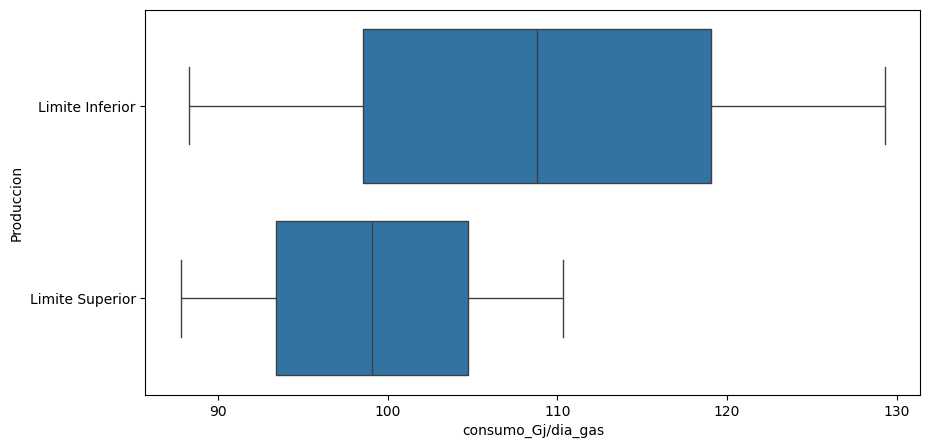

In [140]:
plt.figure(figsize=(10,5))
sns.boxplot(dfgas_c2[dfgas_c2['consumo_Gj/dia_gas']<175],x='consumo_Gj/dia_gas',y='Produccion')

### Model

In [43]:
dfgas_clean.columns

Index(['lec_ini_cont_m3_gas', 'lec_fin_cont_m3_gas', 'delta_lect_cont_m3_gas',
       'consumo_m3_std/dia_gas', 'consumo_Gj/dia_gas', 'masa_ton/dia_gas',
       'consumo_especifico_Gj/ton_gas', 'consumo_especifico_kcal/kg',
       'lec_ini_cont_kW_energia', 'lec_fin_cont_kW_energia',
       'consumo_especifoco_energia'],
      dtype='object')

### Arima

In [32]:
from statsmodels.tsa.arima.model import ARIMA

In [33]:
modelo_arima=ARIMA(dfgas_clean['consumo_especifoco_energia'],order=(1, 1, 0),trend='t', freq='D')

In [34]:
modelo_arima_fit = modelo_arima.fit()

In [35]:
modelo_arima_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   SARIMAX Results                                    
======================================================================================
Dep. Variable:     consumo_especifoco_energia   No. Observations:                  329
Model:                         ARIMA(1, 1, 0)   Log Likelihood               -1782.739
Date:                        Tue, 10 Dec 2024   AIC                           3571.478
Time:                                11:23:21   BIC                           3582.857
Sample:                            01-01-2024   HQIC                          3576.018
                                 - 11-24-2024                                         
Covariance Type:                          opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.3638      2.108      0.173      0.863      -3.768       4.496
ar.L1         -0.4899      0.017    -29.014      0.000      -0.523      -0.457
sigma2      3076.5772     79.324     38.785      0.000    2921.106    3232.049
===================================================================================
Ljung-Box (L1) (Q):                  12.39   Jarque-Bera (JB):              4194.42
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.70   Skew:                            -0.98
Prob(H) (two-sided):                  0.07   Kurtosis:                        20.41
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<Axes: >

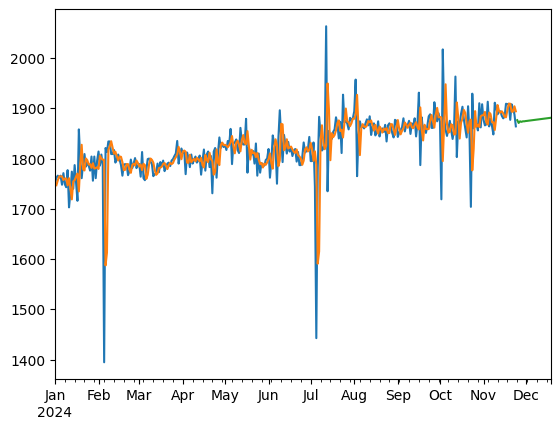

In [36]:
dfgas_clean['consumo_especifoco_energia'].plot()
modelo_arima_fit.predict(1).plot()
modelo_arima_fit.forecast(25).plot()

<Axes: >

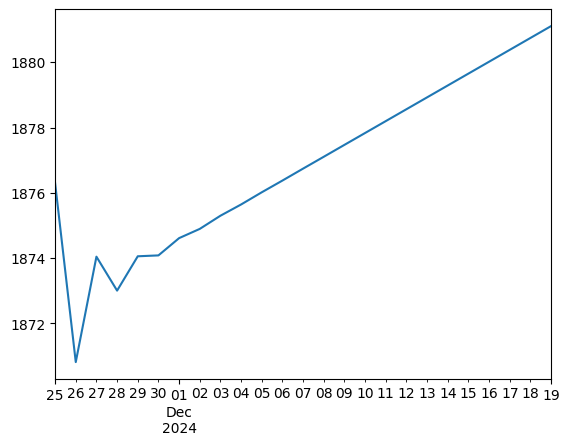

In [37]:
modelo_arima_fit.forecast(25).plot()

### ARMA Contador

<Axes: >

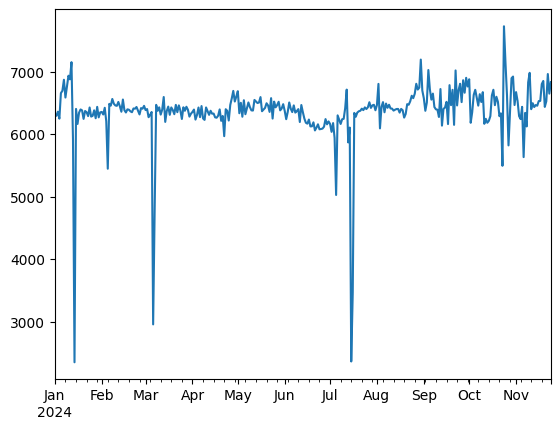

In [74]:
dfgas_clean['consumo_m3_std/dia_gas'].plot()

In [38]:
from sklearn.linear_model import LinearRegression

In [ ]:
X_energia=dfgas_clean['consumo_especifoco_energia'].values
dias=np.array(range(X_energia.shape[0]))

In [ ]:
modelo_lr=LinearRegression().fit(dias.reshape((-1,1)),X_energia)

In [49]:
modelo_lr.score(dias.reshape((-1,1)),X_energia)

0.40490101018172076

In [54]:
from sklearn.metrics import mean_absolute_percentage_error

In [56]:
mean_absolute_percentage_error(X_energia,modelo_lr.predict(dias.reshape((-1,1))))*100

1.3623963005979403

In [58]:
modelo_lr.coef_, modelo_lr.intercept_

(array([0.39073959]), 1761.7332964907434)

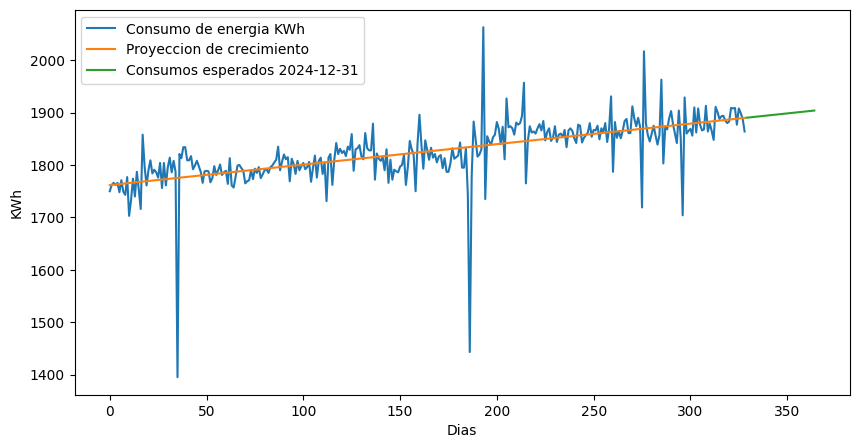

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(range(329),X_energia, label='Consumo de energia KWh')
plt.plot(range(329),modelo_lr.predict(dias.reshape((-1,1))), label='Proyeccion de crecimiento')
plt.plot(range(329,365),modelo_lr.predict(np.array(range(329,365)).reshape((-1,1))),label='Consumos esperados 2024-12-31')
plt.xlabel('Dias')
plt.ylabel('KWh')

plt.legend()

In [ ]:
dfgas_clean[['consumo_Gj/dia_gas','masa_ton/dia_gas','consumo_especifoco_energia']].corr()

,consumo_Gj/dia_gas,masa_ton/dia_gas,consumo_especifoco_energia
consumo_Gj/dia_gas,1.000000,0.205866,0.303284
masa_ton/dia_gas,0.205866,1.000000,0.427816
consumo_especifoco_energia,0.303284,0.427816,1.000000


In [68]:
dfgas_clean[['consumo_Gj/dia_gas','masa_ton/dia_gas','consumo_especifoco_energia']].cov()

,consumo_Gj/dia_gas,masa_ton/dia_gas,consumo_especifoco_energia
consumo_Gj/dia_gas,320.592917,14.396262,317.178688
masa_ton/dia_gas,14.396262,15.253679,97.593601
consumo_especifoco_energia,317.178688,97.593601,3411.572226


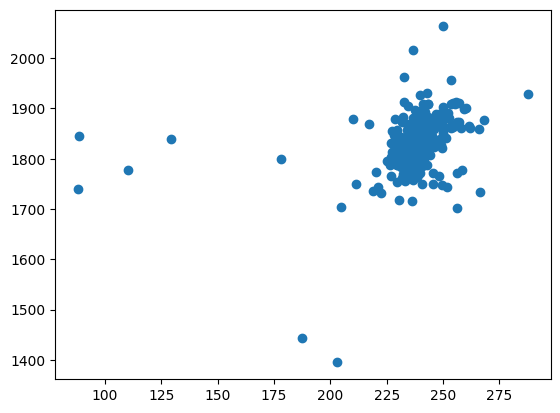

In [70]:
plt.scatter(dfgas_clean['consumo_Gj/dia_gas'],dfgas_clean['consumo_especifoco_energia'])

# Consumo de Energia

In [29]:
path_temp='C:/Users/ccollazos/Documents/Summan/Corona/TEMP_MINUTOS_summan.csv'
dftemp=pd.read_csv(path_temp, low_memory=True, index_col=[0], parse_dates=True, delimiter=';',date_format='%d/%m/%Y %H:%M', dayfirst=True)

In [30]:
dftemp.sort_index(inplace=True)
dftemp=dftemp.resample("min").first()

In [33]:
#dftemp.to_csv('temp_horno_4.csv')

In [35]:
dfgast=dftemp[((dftemp.index.to_period('D')>'2024-06-01') & (dftemp.index.to_period('D')<='2024-11-24'))].copy()

In [36]:
df_gas=dfgas_clean.loc[dfgas_clean.index>='2024-06-02'].copy()

In [37]:
df_gas.shape

(176, 11)

In [49]:
dfgast=dfgast.interpolate(method='time')

In [50]:
valor_temperatura=dfgast.values.reshape((176,1440,30))

In [51]:
objetivo=df_gas['consumo_especifico_kcal/kg'].values.reshape((-1,1))

In [ ]:
# objetivo=df_gas[['consumo_especifico_kcal/kg','masa_ton/dia_gas']].values

In [52]:
import tensorflow as tf # type: ignore
from keras import Sequential # type: ignore
from keras.layers import Dense,Flatten # type: ignore

In [202]:
valor_temperatura.shape, objetivo.shape

((176, 1440, 30), (176, 1))

In [281]:
model_ejemplo=Sequential(name='modelo_surrogativo_burdo')
#model_rn.add(Flatten(input_shape=(30,15)))
model_ejemplo.add(Dense(150, activation='relu', input_shape=(1440,30)))
model_ejemplo.add(Dense(100, activation='linear'))
model_ejemplo.add(Dense(25, activation='linear'))
model_ejemplo.add(Flatten())
model_ejemplo.add(Dense(1, activation='linear'))

In [270]:
model_ejemplo.summary()

Model: "modelo_surrogativo_burdo"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_24 (Dense)                │ (None, 1440, 150)      │         4,650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 1440, 100)      │        15,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 1440, 25)       │         2,525 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 36000)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 2)              │        72,002 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 94,277 (368.27 KB)

 Trainable params: 94,277 (368.27 KB)

 Non-trainable params: 0 (0.00 B)

In [282]:
model_ejemplo.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [284]:
model_ejemplo.fit(valor_temperatura,objetivo, epochs=8)

Epoch 1/8
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 340748.4375 - mae: 487.4977
Epoch 2/8
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 155723.8906 - mae: 324.6599
Epoch 3/8
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 126468.7969 - mae: 278.6115
Epoch 4/8
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 166588.7656 - mae: 271.8109
Epoch 5/8
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 80026.2422 - mae: 222.0563
Epoch 6/8
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 82089.8906 - mae: 151.3003
Epoch 7/8
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 88908.2500 - mae: 124.3857
Epoch 8/8
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 133118.7188 - mae: 113.7775


In [ ]:
yhat=model_ejemplo.predict(valor_temperatura)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


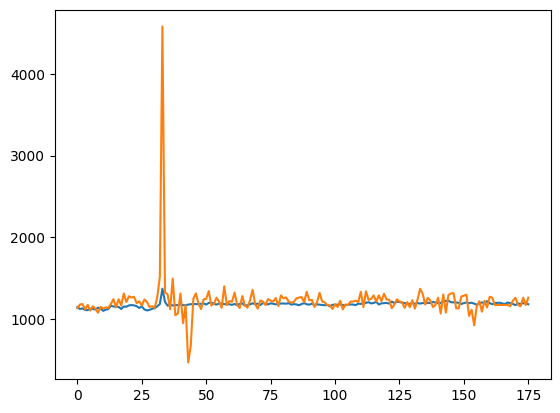

In [287]:
plt.plot(yhat)
plt.plot(objetivo)

In [ ]:
#model_ejemplo.save('mlp_horno.keras') 

In [54]:
import tensorflow as tf
from keras import saving as ks

In [55]:
model_imp=ks.load_model('mlp_horno.keras', custom_objects=None, compile=True, safe_mode=True)

In [56]:
model_imp.summary()

Model: "modelo_surrogativo_burdo"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                │ (None, 1440, 150)      │         4,650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 1440, 100)      │        15,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 1440, 25)       │         2,525 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 36000)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 1)              │        36,001 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 174,830 (682.93 KB)

 Trainable params: 58,276 (227.64 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 116,554 (455.29 KB)

In [89]:
ypred=model_imp.predict(valor_temperatura)

6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 89ms/step


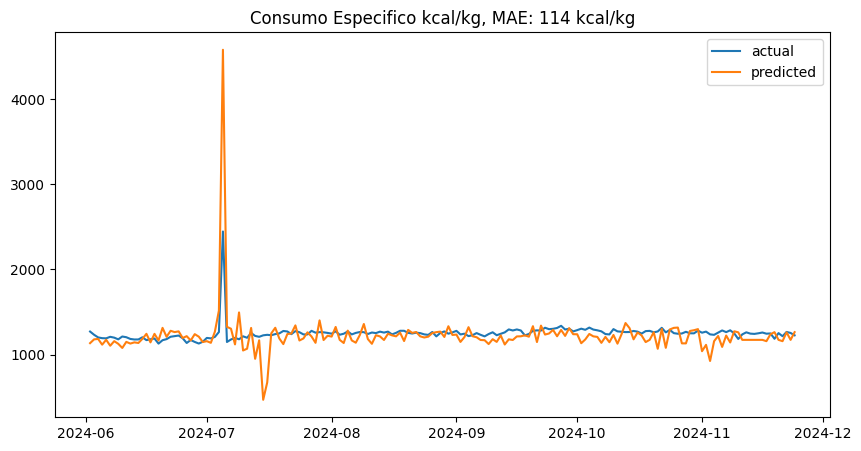

In [99]:
plt.figure(figsize=(10,5))
plt.plot(df_gas.index,ypred, label='actual')
plt.plot(df_gas.index,objetivo, label='predicted')
plt.title('Consumo Especifico kcal/kg, MAE: 114 kcal/kg')
plt.legend()

In [71]:
pesos=model_imp.get_weights()

<Axes: >

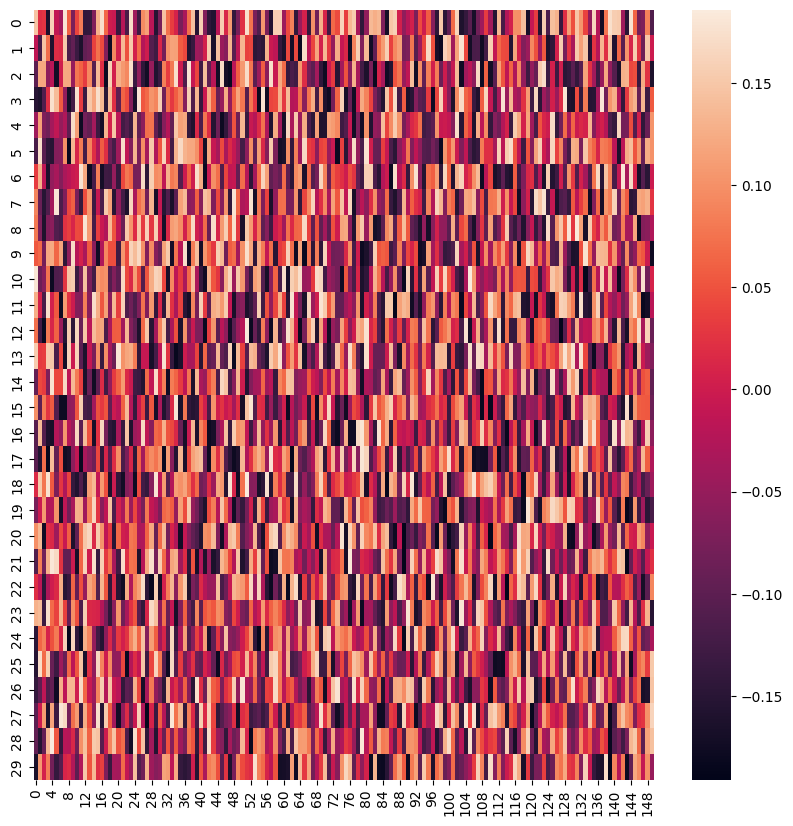

In [94]:
plt.figure(figsize=(10,10))
sns.heatmap(pesos[0])

In [126]:
dfgast.shape

(253440, 30)

In [124]:
model_imp.predict(dfgast.iloc[9:1449].values.reshape((1,1440,30)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


array([[1267.6447]], dtype=float32)